In [17]:
import pandas as pd
from arff2pandas import  a2p
import pickle
import numpy as np

In [16]:
class loguni():
    def __init__(self, low, high, base = 10):
        self.low = low
        self.high = high
        self.base = base
        
    def rvs(self, size = 1, random_state = None):
        #def rvs(self, num = 1, random_state = None):
        temp = np.power(self.base, np.random.uniform(self.low, self.high, size))
        #res = self.sample(num)
        res = temp
        #res = res[res>=0]
        res = res.reshape(-1,1)

        return res

In [3]:
# Read data
with open('results__2000__svc__predictive_accuracy.arff') as f:
    df = a2p.load(f)
    #print(ds)
    

# Rename all the columns without the @ thing
df = df.rename(columns={col: col.split('@')[0] for col in df.columns})


# Sorting all rows by first task id and then performance for each task
df = df.sort_values(by = ['task_id','predictive_accuracy'], ascending=False)


# Casting task_id to type int
df['task_id'] = df['task_id'].astype('int64')

task_ids = list(df.task_id.unique())


In [4]:
# Unpickling example

results = []
for task_no in task_ids:
    no = str(task_no)
    fil_name = "kde_v_uni_" + no + ".pickle" 
    pickle_off = open(fil_name,"rb")
    emp = pickle.load(pickle_off)
    results.append(emp)

In [8]:
#index diff = k_i -u_i and perf diff = k_s - u_s
indices = []
for item in results:
    print (item['index_diff'])
    indices.append(item['index_diff'])

-13
-10
5
5
0
-14
-1
-16
0
2
4
-2
-15
5
8
-8
-15
17
-7
0
-3
-12
4
12
11
10
-2
19
2
-10
7
7
-5
-4
2
-13
-13
7
1
8
1
4


In [7]:
perf = []
for item in results:
    print (item['perf_diff'])
    perf.append(item['perf_diff'])

0.0
-0.0014880952380952328
0.005018820577164379
0.0011890606420927874
0.0
0.0
-0.0014054813773717312
0.0
0.0
0.0
0.0008309098462816467
0.0024368346800052176
0.002020202020202033
0.0002651113467656563
0.0
-0.00015552099533433505
-0.013418079096045199
0.0008000000000000229
0.007092198581560294
0.0
0.005015673981191182
-0.001304064333840449
0.004392386530014614
0.0013020833333333703
-0.0034632034632035014
-0.0009097525473070744
0.0020000000000000018
0.0
0.00142348754448407
0.002584933530280664
-0.0013577732518669228
0.0010000000000000009
0.01041666666666663
0.000500000000000056
0.0014999999999999458
-0.000500000000000056
-0.0028612303290413976
0.01849999999999996
0.0
0.02399999999999991
4.999999999999449e-05
0.0003128911138923218


In [9]:
np.mean(indices)

-0.5238095238095238

In [13]:
indices = pd.DataFrame(indices)
PERF = pd.DataFrame(perf)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aab1213b128>]],
      dtype=object)

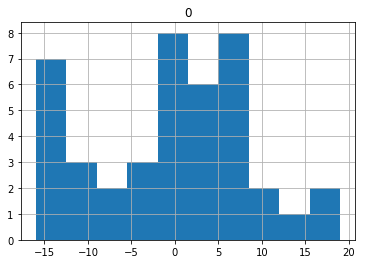

In [12]:
%matplotlib inline
indices.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aab2308e470>]],
      dtype=object)

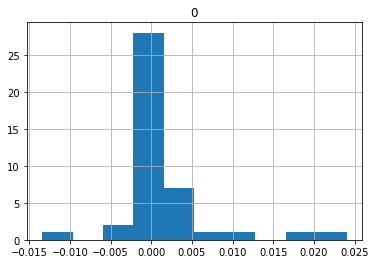

In [15]:
PERF.hist()